Next line is to force reload of separate functions and scripts

In [2]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [1]:
import pandas as pd
import numpy as np
import os
from IPython.display import display_html
from IPython.display import display
import watermark
%matplotlib inline
from matplotlib import pyplot as plt

def display_side_by_side(*args):
    html_str=''
    for df in args:
        html_str+=df.to_html()
    html_str = html_str.replace('table','table style="display:inline; border:0px"')          
    display_html(html_str,raw=True)

## Watermarks
Watermarks is a nice <a href="https://github.com/rasbt/watermark">plugin</a> that enables some convenience prints for system/version info etc. See more examples <a href="https://github.com/rasbt/watermark/blob/master/docs/watermark.ipynb">here</a>.

In [2]:
%load_ext watermark

In [4]:
%watermark -iv

pandas    0.20.1
numpy     1.15.2
matplotlib2.0.2
watermark 1.8.0



In [2]:
data = {'ID': [1, 2, 2],'Names': ['Kate', 'John', 'Max'],'Age': ['g50', 40, 25], 'Values': [3, 4, np.nan] , 'Height': [174, 181, '169']}
df = pd.DataFrame(data=data)

In [3]:
print("Length of dataframe: {}".format(len(df)))
df.head()

Length of dataframe: 3


,Age,Height,ID,Names,Values
0,g50,174,1,Kate,3.0
1,40,181,2,John,4.0
2,25,169,2,Max,NaN


In [4]:
display(df.columns)

Index(['Age', 'Height', 'ID', 'Names', 'Values'], dtype='object')

In [5]:
df.describe()

C:\Program Files\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,ID,Values
count,3.000000,2.000000
mean,1.666667,3.500000
std,0.577350,0.707107
min,1.000000,3.000000
25%,1.500000,NaN
50%,2.000000,NaN
75%,2.000000,NaN
max,2.000000,4.000000


In [6]:
colnames = df.columns
for colname in colnames:
    print('Type of column {} is {}'.format(colname,df[colname].dtype))
    print('Type of column {} values is {}'.format(colname,df[colname].values.dtype))
    print('-'*30)

Type of column Age is object
Type of column Age values is object
------------------------------
Type of column Height is object
Type of column Height values is object
------------------------------
Type of column ID is int64
Type of column ID values is int64
------------------------------
Type of column Names is object
Type of column Names values is object
------------------------------
Type of column Values is float64
Type of column Values values is float64
------------------------------


In [7]:
# Count NaNs and non-numeric field
colnames = df.columns
for colname in colnames:    
    print('Column {} has {} NaN observations'.format(colname,pd.isnull(df[colname]).sum()))
    print('Column {} has {} non-numeric observations'.format(colname, len(df.loc[pd.to_numeric(df[colname], errors='coerce').isnull(), colname])))
    print('-'*30)
    

Column Age has 0 NaN observations
Column Age has 1 non-numeric observations
------------------------------
Column Height has 0 NaN observations
Column Height has 0 non-numeric observations
------------------------------
Column ID has 0 NaN observations
Column ID has 0 non-numeric observations
------------------------------
Column Names has 0 NaN observations
Column Names has 3 non-numeric observations
------------------------------
Column Values has 1 NaN observations
Column Values has 1 non-numeric observations
------------------------------


### Duplicates in some column

In [8]:
counts = df['ID'].value_counts()
counts  = counts[counts >= 2].index

display(df[df['ID'].isin(counts)])
print("{} duplicate IDs".format(df.duplicated(subset=['ID'], keep='first').sum()))
orig_length = len(df)


,Age,Height,ID,Names,Values
1,40,181,2,John,4.0
2,25,169,2,Max,NaN


1 duplicate IDs


### Drop duplicates from all columns

In [10]:
data = {'ID': [1, 2, 2],'Names': ['Kate', 'John', 'Max'],'Age': [47, 40, 25], 'Values': [3, 4, np.nan] , 'Height': [174, 181, '169']}
df = pd.DataFrame(data=data)

# Drop observations where NaN
colnames = df.columns
for colname in colnames:    
    print('Dropping {} observations due to NaN in {}'.format(pd.isnull(df[colname]).sum(), colname))
    df = df[pd.isnull(df[colname]) == False]

Dropping 0 observations due to NaN in Age
Dropping 0 observations due to NaN in Height
Dropping 0 observations due to NaN in ID
Dropping 0 observations due to NaN in Names
Dropping 1 observations due to NaN in Values


### Columns (discrete numeric) 1-by-1

,Age,count
0,25,1
1,40,2


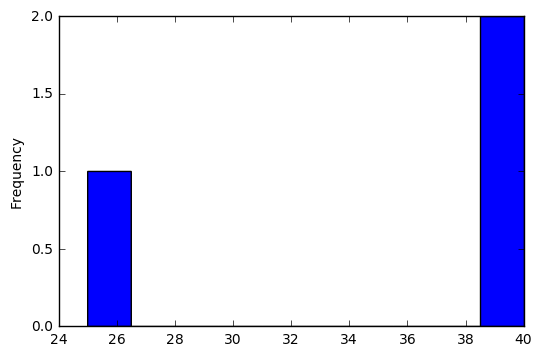

In [15]:
data = {'ID': [1, 2, 2],'Names': ['Kate', 'John', 'Max'],'Age': [40, 40, 25], 'Values': [3, 4, np.nan] , 'Height': [174, 181, '169']}
df = pd.DataFrame(data=data)

var = 'Age'
gg = df[[var]].fillna(-1).reset_index().groupby([var], as_index = False).count()
gg.columns = [var, 'count']
display(gg)
df[var].plot(kind='hist')

### Columns (continuous numeric) 1-by-1

In [17]:
def continuous_binning(pdseries, bins=''):
    '''
    Bins continious variable. Treats also NaNs
    Returns data frame.
    Arguments: 
        - pdseries: pandas.Series to be binned
        - bins (optional): user-defined bins. If
          not supplied then 5+1 bins by default.
    '''
    df = pd.DataFrame()
    if bins == '':
        df['bins'] = pd.cut(pdseries, 5, right = True)        
    else:
        df['bins'] = pd.cut(pdseries, bins, right = True)
    df = df[['bins']].reset_index().groupby(['bins'], as_index = False).count()
    df.columns = ['bins','count']
    df_nans = pd.DataFrame({'bins': ['NaN'], 'count': [len(pdseries[np.isnan(pdseries)])]})
    df = df.append(df_nans, ignore_index = True)
    if df['count'].sum() != len(pdseries):
        raise ValueError('Something wrong in function continuous_binning!')
    return df, bins

,bins,count
0,"(-inf, 0]",0
1,"(0, 0.5]",0
2,"(0.5, 1]",0
3,"(1, 1.5]",0
4,"(1.5, 2]",0
5,"(2, 2.5]",0
6,"(2.5, 3]",1
7,"(3, 3.5]",1
8,"(3.5, 4]",0
9,"(4, 4.5]",1


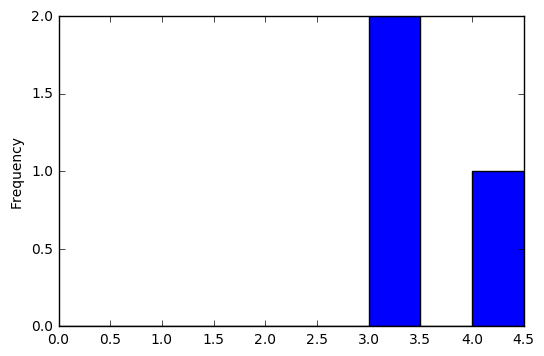

In [18]:
data = {'ID': [1, 2, 2],'Names': ['Kate', 'John', 'Max'],'Age': [40, 40, 25], 'Values': [3.0, 4.1, 3.2] , 'Height': [174, 181, '169']}
df = pd.DataFrame(data=data)

var = 'Values'
gg = df[var]
bins = [-np.inf] + list(np.arange(0,5,0.5)) + [np.inf]
gg, _ = continuous_binning(gg,bins)
display(gg)
df[var].plot(kind='hist',bins=bins)
